## Analisis de Sentimientos en comentarios de la Revista New York Time

In [1]:
# librerias
import pandas as pd
import seaborn as sns
from textblob import TextBlob 
from google_trans_new import google_translator
from deep_translator import GoogleTranslator

In [2]:
# cargar datos
df = pd.read_csv('./data/nyt.csv')
df.head(5)

,content
0,If the choice is between mining for bitcoin - ...
1,"<br/>To me, Bitcoin (et al) appears to be an e..."
2,Bitcoin is a pyramid scheme backed by nothing ...
3,What does it cost in energy to dig up and refi...
4,You forgot to mention stock buybacks.


In [3]:
# dimensiones del dataframe
df.shape

(239, 1)

In [4]:
# crear copia del df
df2 = df.copy()

### Analisis de sentimientos con TextBlob

#### Polaridad
indica si el mensaje es positivo o negativo
- Mientras mas cercano a 1, mas positivo es el mensaje
- Mientras mas cercano a -1, mas negativo es el mensaje

#### Subjetividad
indica la objetividad del mensaje
- Mientras mas cercano a 1, mas se concidera una opinion
- Mientras mas cercano a 0, se considera un hecho

In [5]:
TextBlob('I love Python').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [6]:
TextBlob('I hate java').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [7]:
# en otro idioma
TextBlob('Amo el lenguaje java').translate(from_lang='es', to='en').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [8]:
# traducir oraciones
blob = TextBlob('Hola como te va?')
blob.translate(from_lang='es', to='en')

TextBlob("Hello how are you doing?")

In [9]:
# traducir con deep_translator
GoogleTranslator(source='auto', target='en').translate('hola mundo bienvenidos al dia')

'hello world welcome to the day'

### Crear una nueva columna con los comentarios traducidos

In [10]:
df3 = df.iloc[0:2]
df3.shape
df3

,content
0,If the choice is between mining for bitcoin - ...
1,"<br/>To me, Bitcoin (et al) appears to be an e..."


In [19]:
df3['Traducido'] = df3['content'].apply(lambda x: GoogleTranslator(source='auto', target='es').translate(x))
df3

/tmp/ipykernel_284/264483579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Traducido'] = df3['content'].apply(lambda x: GoogleTranslator(source='auto', target='es').translate(x))


,content,Traducido
0,If the choice is between mining for bitcoin - ...,"Si la elección es entre la minería de bitcoin,..."
1,"<br/>To me, Bitcoin (et al) appears to be an e...","<br/>Para mí, Bitcoin (et al) parece ser un ju..."


### Crear columna de Polaridad de cada comentario

In [11]:
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,content,polarity
0,If the choice is between mining for bitcoin - ...,-0.150000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566
3,What does it cost in energy to dig up and refi...,0.146892
4,You forgot to mention stock buybacks.,0.000000


### Crear columna de Subjetividad de cada comentario

In [12]:
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,content,polarity,subjectivity
0,If the choice is between mining for bitcoin - ...,-0.150000,0.250000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143,0.471429
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566,0.415734
3,What does it cost in energy to dig up and refi...,0.146892,0.598589
4,You forgot to mention stock buybacks.,0.000000,0.000000


### Valor maximo de Polaridad

In [13]:
df['polarity'].max()

1.0

### Valor minimo de Polaridad

In [14]:
df['polarity'].min()

-1.0

### Promedio de Polaridad

In [15]:
df['polarity'].mean()

0.0596143580842847

### Comentarios con Polaridad mayores a 0.4

In [16]:
df[df['polarity'] > 0.4][['content', 'polarity']]

,content,polarity
15,Hmmm . . .<br/><br/>Cryptocurrency i.e. Bitcoi...,0.500000
54,Glad to see this judge is waking up.,0.500000
73,More Trump bashing ....nice picture ? Get over...,0.500000
87,That is a perfect portrayal of an unhinged pre...,1.000000
108,I am not that sure that Trump cares mostly for...,0.500000
115,"Great job skewering Trump, but I’m sure he doe...",0.450000
119,"If a Democrat gets into office in 2020, I'd lo...",0.500000
189,“280 character brain-squirts” <br/><br/>Best d...,0.416667
194,Trump's lack of humanity and ethics are well ...,0.500000
196,I love reading the moaning pain of America's l...,0.500000


### Grafica de la Polaridad y Subjetividad

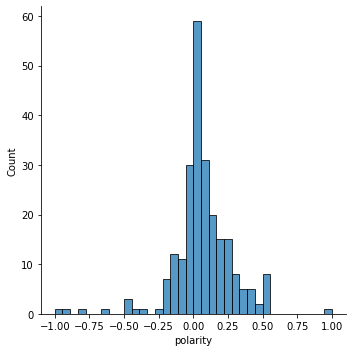

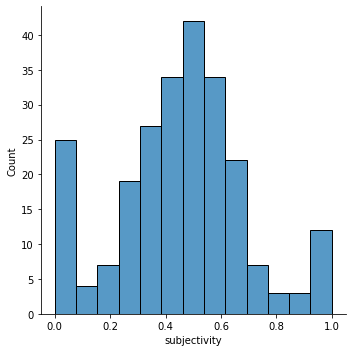

In [17]:
sns.displot(df['polarity'])
sns.displot(df['subjectivity'])

### Agregar columnas al dataframe con un ciclo while y variar el nombre de cada columna

In [18]:
# n = 1
# while n < 5:
#     df['P'+ str(n)] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
#     df['S'+ str(n)] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
#     n += 1

# df.head()